# Detecting Credit Card Fraud with Machine Learning

Project Authors: Immaculate, Joan, Bertha, James, John, Evelyne

## Overview

Credit card fraud is a persistent and growing problem in the financial industry, costing billions of dollars each year. With the rise of digital payments and online transactions, detecting fraudulent activities in real-time has become a major priority. This project aims to analyze credit card transaction data to detect potential fraud using advanced data analytics and machine learning techniques. By identifying abnormal patterns and behaviors, financial institutions can protect consumers and minimize financial loss.

## Business Understanding

Financial institutions face high risks from fraudulent transactions, which can lead to substantial financial losses and damaged customer trust. Traditional fraud detection methods, such as rule-based systems, are often not sufficient to catch increasingly sophisticated fraudulent behavior. Therefore, businesses require intelligent systems that can automatically and accurately detect anomalies in transaction data. This project seeks to bridge that gap by developing a data-driven model that can learn from past transaction patterns and flag suspicious activity in near real-time.

## Objectives

1. Analyze and preprocess credit card transaction data for fraud detection.

2. Identify key features and patterns that indicate fraudulent behavior.

3. Develop and compare multiple machine learning models for fraud classification.

4. Address class imbalance using techniques like SMOTE, undersampling, or ensemble methods.

5. Evaluate model performance using metrics such as precision, recall, and AUC-ROC.

6. Ensure the model is interpretable and efficient enough for potential real-time deployment.

## Research Questions

1. What distinguishing characteristics or patterns can be identified between fraudulent and legitimate credit card transactions?

2. Which machine learning algorithms are most effective for detecting fraud in highly imbalanced transaction datasets?

3. What techniques can be applied to address class imbalance and enhance the performance of fraud detection models?

4. How can an optimal balance between precision and recall be achieved to minimize both false positives and false negatives in fraud detection?

5. Is it feasible to deploy the fraud detection model in real-time or near real-time environments without compromising accuracy and efficiency?

6. To what extent can the fraud detection model provide interpretable outputs suitable for compliance and audit purposes in the financial industry?





## Success Criteria


### Technical Criteria
1. Recall (Fraud Class) ≥ 90% – correctly identify most fraudulent transactions.

2. Precision (Fraud Class) ≥ 70% – limit false alarms to reduce customer disruption.

3. AUC-ROC Score ≥ 0.90 – strong ability to distinguish fraud vs. non-fraud.

4. Class Imbalance Handling – use techniques like SMOTE or undersampling to ensure balanced learning.

5. Model Stability – consistent results across validation folds or different data splits.

   
### Business Criteria
1. Reduced Financial Losses – potential savings through early fraud detection.

2. Low False Positive Rate – minimize blocking of legitimate transactions.

3. Real-Time Readiness – model is efficient enough for real-time or near-real-time deployment.

4. Interpretability – model outputs are explainable for auditing and compliance.



# Data Understanding

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from matplotlib.gridspec import GridSpec
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
!pip install --upgrade pandas

  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
!pip install pandas==2.2.2


  Using cached pandas-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
Using cached pandas-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3


In [ ]:
df = pd.read_csv('credit_card_transactions.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0,22844.0


In [ ]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
442166,442166,2019-07-15 18:32:11,347612609554823,fraud_Windler LLC,kids_pets,16.20,Robert,James,M,18316 Cannon Place,...,-69.2675,3228,Lexicographer,1995-12-28,a00ecb5d980762eb88e62e2802628387,1.342377e+09,44.551386,-69.779326,0.0,4963.0
442167,442167,2019-07-15 18:32:46,6011381817520024,"fraud_Hettinger, McCullough and Fay",home,30.17,Kristen,Allen,F,8619 Lisa Manors Apt. 871,...,-104.1974,635,Product/process development scientist,1973-07-13,22ee4826588973a08451f0599c755a66,1.342377e+09,41.993945,-103.908718,0.0,69358.0
442168,442168,2019-07-15 18:33:14,676369110710,fraud_Bode-Rempel,kids_pets,133.94,David,Wolfe,M,81261 Garcia Underpass Suite 741,...,-83.2911,75830,"Engineer, automotive",1974-12-28,ca45c9274381be3e05537ad831a031da,1.342377e+09,42.875172,-82.399596,0.0,48040.0
442169,442169,2019-07-15 18:33:42,4874017206859125,"fraud_Bahringer, Bergnaum and Quitzon",home,53.93,Lauren,Williams,F,065 Jones Stravenue,...,-122.6847,42817,Planning and development surveyor,1982-05-28,aad8464d1f8af55e033119c126723f8d,1.342377e+09,44.921046,-122.975831,0.0,97301.0
442170,442170,2019-07-15 18:34:12,372509258176510,"fraud_Walter, Hettinger and Kessler",personal_care,71.29,Kristen,Hanson,F,26544 Andrea Glen,...,-83.4845,6951,Learning disability,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442171 entries, 0 to 442170
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             442171 non-null  int64  
 1   trans_date_trans_time  442171 non-null  object 
 2   cc_num                 442171 non-null  int64  
 3   merchant               442171 non-null  object 
 4   category               442171 non-null  object 
 5   amt                    442171 non-null  float64
 6   first                  442171 non-null  object 
 7   last                   442171 non-null  object 
 8   gender                 442171 non-null  object 
 9   street                 442171 non-null  object 
 10  city                   442171 non-null  object 
 11  state                  442171 non-null  object 
 12  zip                    442171 non-null  int64  
 13  lat                    442171 non-null  float64
 14  long                   442171 non-nu

In [ ]:
df.shape

(442171, 24)

In [ ]:
#stastical summary of the data
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
count,442171.000000,4.421710e+05,442171.000000,442171.000000,442171.000000,442171.000000,4.421710e+05,4.421700e+05,442170.000000,442170.000000,442170.000000,375367.000000
mean,221085.000000,4.163022e+17,70.618044,48766.876659,38.538320,-90.211521,8.951353e+04,1.334753e+09,38.537549,-90.211755,0.006382,46765.771538
std,127643.917276,1.307513e+18,159.172946,26918.307430,5.074395,13.772238,3.041149e+05,4.849372e+06,5.108192,13.784712,0.079633,25852.081257
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.671242,0.000000,1001.000000
25%,110542.500000,1.800365e+14,9.670000,26041.000000,34.668900,-96.798000,7.430000e+02,1.330839e+09,34.739461,-96.884024,0.000000,24986.000000
50%,221085.000000,3.519607e+15,47.590000,48174.000000,39.354300,-87.458100,2.456000e+03,1.335061e+09,39.364878,-87.412985,0.000000,45822.000000
75%,331627.500000,4.642255e+15,83.270000,72011.000000,41.940400,-80.128400,2.047800e+04,1.339039e+09,41.957728,-80.204866,0.000000,68069.000000
max,442170.000000,4.992346e+18,25086.940000,99783.000000,66.693300,-67.950300,2.906700e+06,1.342377e+09,67.510267,-66.956540,1.000000,99403.000000


In [ ]:
# Number of unique values per column
df.nunique()

,0
Unnamed: 0,442171
trans_date_trans_time,435410
cc_num,938
merchant,693
category,14
amt,35285
first,342
last,472
gender,2
street,938


In [ ]:
print(df['category'].value_counts())

category
gas_transport     45039
grocery_pos       42462
home              41905
shopping_pos      39878
kids_pets         38360
shopping_net      33157
entertainment     32031
food_dining       31192
personal_care     30957
health_fitness    29387
misc_pos          26961
misc_net          21572
grocery_net       15479
travel            13791
Name: count, dtype: int64


In [ ]:
print(df['gender'].value_counts())

gender
F    241825
M    200346
Name: count, dtype: int64


In [ ]:
print(df['job'].value_counts())

job
Film/video editor                    3338
Exhibition designer                  3156
Surveyor, land/geomatics             2980
Naval architect                      2941
Designer, ceramics/pottery           2799
                                     ... 
Armed forces technical officer          8
Sales promotion account executive       7
Contracting civil engineer              7
Dancer                                  7
Learning disability                     1
Name: count, Length: 483, dtype: int64


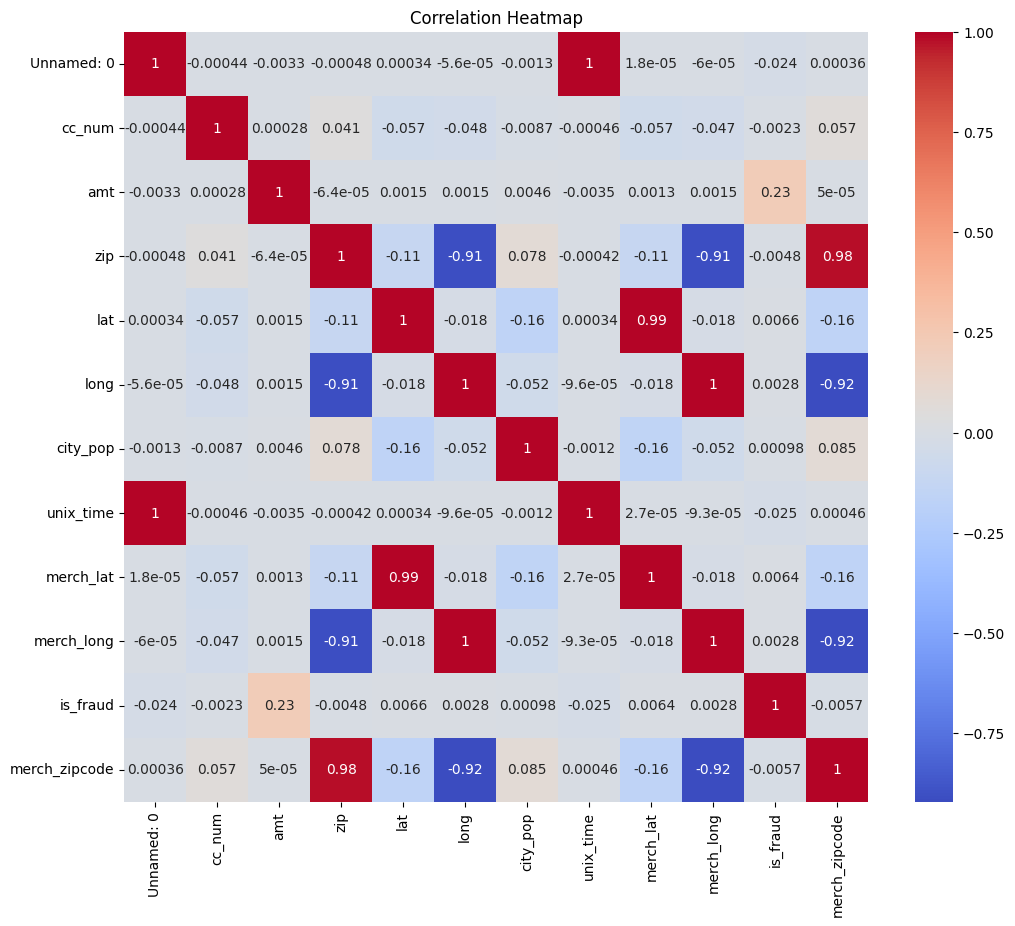

In [ ]:
correlation = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Transaction amount doesn't seem strongly linearly related to the other numerical features.

Cardholder locations are correlated with each other, as are merchant locations, suggesting geographical patterns.

There's a weak tendency for transactions to happen somewhat near the cardholder's location.

City population has a weak linear relationship with geographical coordinates and transaction amount

## Data Cleaning

### Handling Missing Values

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


- For every column with one row with a missing value we simply drop since it doesn't affect the modeling process or insights to be drawn

In [ ]:
#drop those rows
df.dropna(subset=['city', 'state', 'zip', 'lat', 'long', 'city_pop',
                  'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
                  'merch_long', 'is_fraud'], inplace=True)


- For the column merch_zipcode since we have soo many missing values we replace them or fill them with a placeholder value that will not overlap with the real zip codes such as 99999 or we can use the KNN model method

In [ ]:
#Using a placeholder
df['merch_zipcode'].fillna(99999, inplace=True)

<ipython-input-20-ca3ed7dd1aab>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['merch_zipcode'].fillna(99999, inplace=True)


In [ ]:
#Using KNN model
# Rows with known zipcodes
df_with_zip = df[df['merch_zipcode'].notnull()]

# Rows with missing zipcodes but valid coordinates
df_missing_zip = df[df['merch_zipcode'].isnull()].dropna(subset=['merch_lat', 'merch_long'])


In [ ]:
# Features for matching
X_reference = df_with_zip[['merch_lat', 'merch_long']].values
X_missing = df_missing_zip[['merch_lat', 'merch_long']].values

# Train nearest neighbors model (using 1 neighbor)
knn_model = NearestNeighbors(n_neighbors=1)
knn_model.fit(X_reference)


NearestNeighbors(n_neighbors=1)

In [ ]:
#check missing values again
df.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


### Handling Duplicates

In [ ]:
#Check for duplicates
df.duplicated().sum()

np.int64(0)

- Simply means no duplicates so let's move to outliers

### Handling Outliers

- For outliers we fous on the numeric column like amt, city_pop
- But first let us visualize the outliers using boxplots and IQR




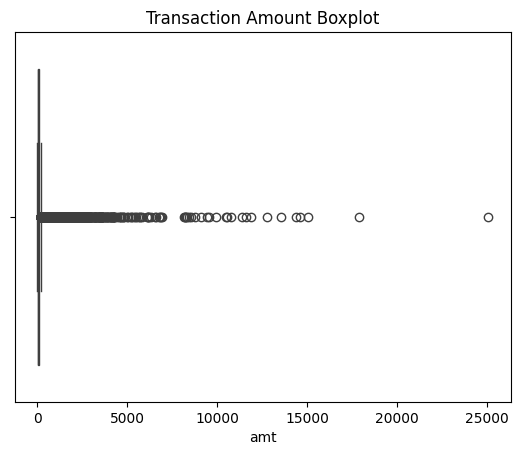

In [ ]:
#Boxplots
sns.boxplot(x=df['amt'])
plt.title('Transaction Amount Boxplot')
plt.show()





In [ ]:
#Using IQR
Q1 = df['amt'].quantile(0.25)
Q3 = df['amt'].quantile(0.75)
IQR = Q3 - Q1

#Define the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")


Lower Bound: -100.72999999999999
Upper Bound: 193.67


In [ ]:
#count the outliers
outliers = df[(df['amt'] < lower_bound) | (df['amt'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 22947


- Outliers might actually be useful fraud signals so we retain them and create a new column flagging whether a transaction is an outliers or not

In [ ]:
#Create a new column for outlier transactions
df['amt_outlier'] = ((df['amt'] < lower_bound) | (df['amt'] > upper_bound)).astype(int)


In [ ]:
#View the column
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,amt_outlier
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0,28705.0,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0,99999.0,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0,83236.0,1
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0,99999.0,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0,22844.0,0


#Exploratory Data Analysis(EDA)

## Univariate Analysis

- We have both numerical variables and categorical variables we can look at them separately

In [ ]:
df[['amt', 'city_pop', 'lat', 'long']].describe()


,amt,city_pop,lat,long
count,442170.000000,4.421700e+05,442170.000000,442170.000000
mean,70.618042,8.951372e+04,38.538310,-90.211536
std,159.173126,3.041152e+05,5.074396,13.772250
min,1.000000,2.300000e+01,20.027100,-165.672300
25%,9.670000,7.430000e+02,34.668900,-96.798000
50%,47.590000,2.456000e+03,39.354300,-87.458100
75%,83.270000,2.047800e+04,41.940400,-80.128400
max,25086.940000,2.906700e+06,66.693300,-67.950300


### Histogram

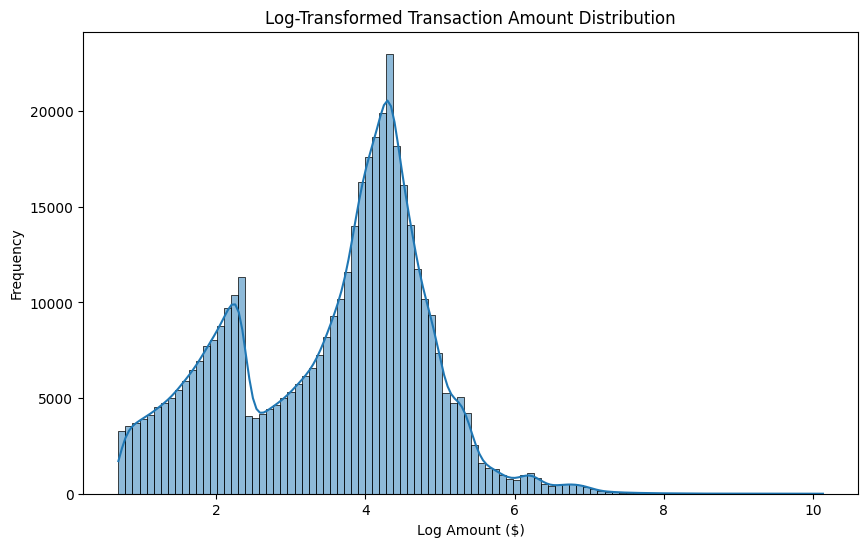

In [ ]:
# For Numerical Variables
# Add a new column with log-transformed amount (+1 to avoid log(0))
df['log_amt'] = np.log(df['amt'] + 1)

# Plot transformed distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['log_amt'], bins=100, kde=True)
plt.title('Log-Transformed Transaction Amount Distribution')
plt.xlabel('Log Amount ($)')
plt.ylabel('Frequency')
plt.show()



- From the statistical summary above we see we are dealing with skewed data that is right-skewed(Positive skew)
- We also note most transactions are small while few are very large which show potential fraud risk.
- Log transformation helped compress extreme values into a manageable range for visualization and hopefully for modeling

### Pie chart

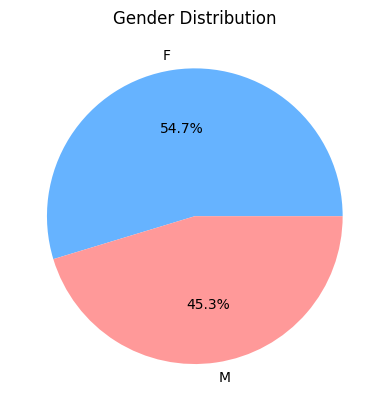

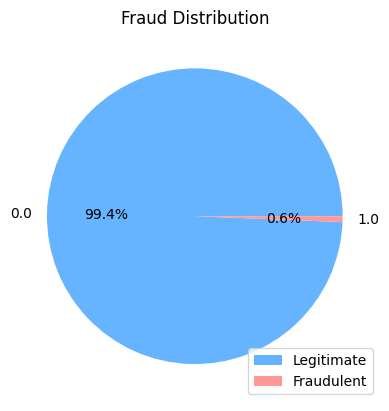

In [ ]:
# For categorical variables
# check the pie chart for gender distribution
df['gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()


#check the pie chart for is_fraud
df['is_fraud'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Fraud Distribution')
plt.ylabel('')
plt.legend(['Legitimate', 'Fraudulent'])
plt.show()


- This dataset is fairly balanced by gender showing a slight majority of transactions being made by female customers
- The second pie chart however shows a significant class imbalance with fraudulent transactins taking a small proportion.
- For that before modeling we will have to address class imbalance using SMOTE

## Bivariate Analysis

### Box Plot

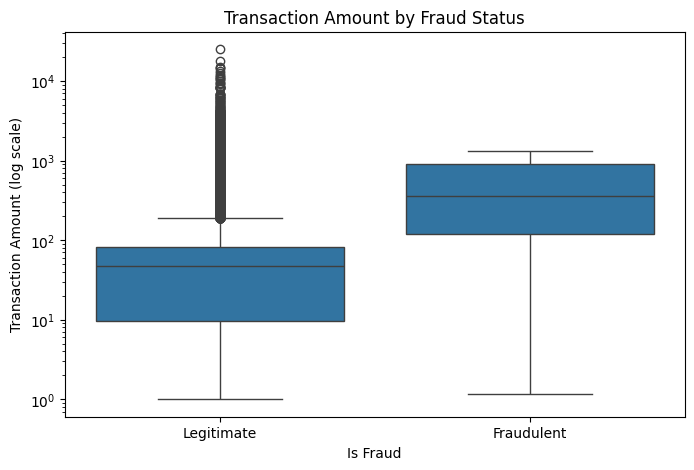

In [ ]:
#Numerical Vs Categorical Data
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_fraud', y='amt', data=df)
plt.yscale('log')  # because of skewed amounts
plt.title('Transaction Amount by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount (log scale)')
plt.xticks([0, 1], ['Legitimate', 'Fraudulent'])
plt.show()


- From the boxplot analysis, it was observed that legitimate transactions show a greater number of high-value outliers compared to fraudulent transactions.
- This suggests that large transaction amounts are not necessarily indicative of fraud, as legitimate customers also engage in occasional high-value purchases.


### Violin Plot

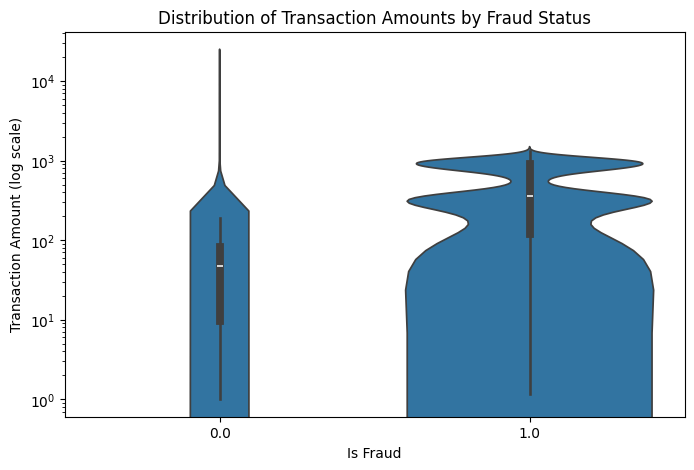

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='is_fraud', y='amt', data=df)
plt.yscale('log')
plt.title('Distribution of Transaction Amounts by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount (log scale)')
plt.show()


- The violin plot comparing transaction amounts by fraud status reveals that legitimate transactions have a wider spread of amounts, including numerous high-value outliers, whereas fraudulent transactions are concentrated within a narrower range.
- This suggests that while high-value transactions are frequent among legitimate users, fraudulent activity tends to occur within moderate transaction amounts likely to avoid raising suspicion.
- This reinforces the need to incorporate additional transaction features beyond the amount for effective fraud detection.

### Grouped Bar Chart

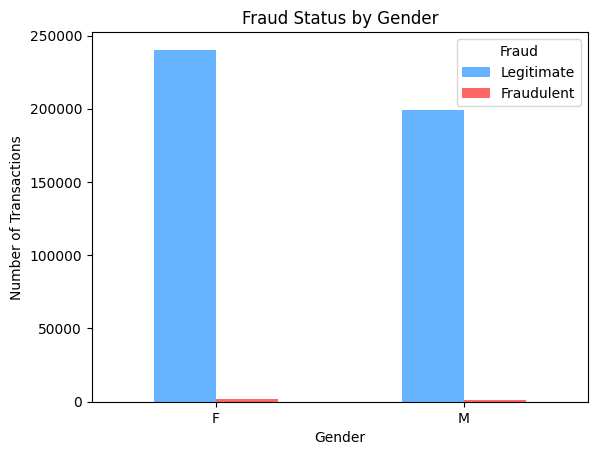

In [ ]:
# Categorical Vs Categorical
fraud_gender = df.groupby(['gender', 'is_fraud']).size().unstack()

fraud_gender.plot(kind='bar', stacked=False, color=['#66b3ff','#ff6666'])
plt.title('Fraud Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.legend(title='Fraud', labels=['Legitimate', 'Fraudulent'])
plt.show()


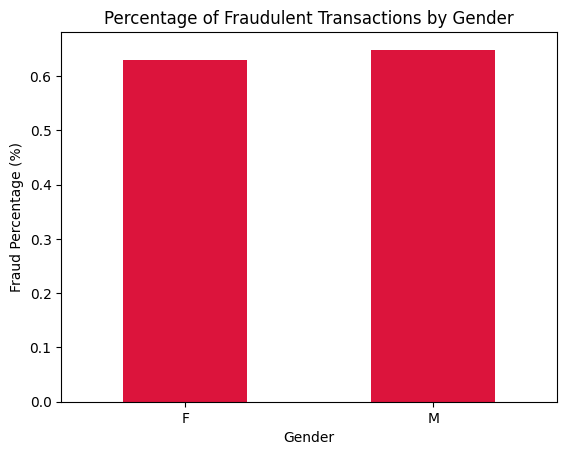

In [ ]:
# Categorical Vs Categorical

fraud_gender = df.groupby(['gender', 'is_fraud']).size().unstack(fill_value=0)

# Convert to percentages
fraud_gender_pct = fraud_gender.div(fraud_gender.sum(axis=1), axis=0) * 100

# Plot percentage fraud bar chart
fraud_gender_pct[1].plot(kind='bar', color='crimson')
plt.title('Percentage of Fraudulent Transactions by Gender')
plt.xlabel('Gender')
plt.ylabel('Fraud Percentage (%)')
plt.xticks(rotation=0)
plt.show()



In [ ]:
print(df.groupby(['gender', 'is_fraud']).size())


gender  is_fraud
F       0.0         240301
        1.0           1523
M       0.0         199047
        1.0           1299
dtype: int64


- The initial grouped bar chart showed that both male and female customers primarily made legitimate transactions, with no visible fraudulent transactions.
- This was due to the extremely low number of fraud cases relative to legitimate transactions, making the fraud bars negligible in size.
- To better visualize fraud patterns, the data was normalized to percentages, revealing that both genders experienced fraud at similar low rates, with minor variations.

### Scatter plot

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


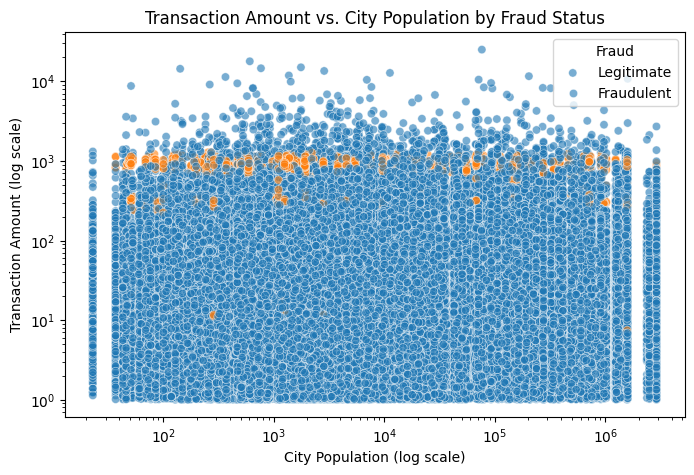

In [ ]:
#Numerical Vs Numerical
plt.figure(figsize=(8, 5))
sns.scatterplot(x='city_pop', y='amt', hue='is_fraud', data=df, alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.title('Transaction Amount vs. City Population by Fraud Status')
plt.xlabel('City Population (log scale)')
plt.ylabel('Transaction Amount (log scale)')
plt.legend(title='Fraud', labels=['Legitimate', 'Fraudulent'])
plt.show()


- Fraudulent transactions appear to be scattered across various city sizes and typically involve moderate to high transaction amounts. This suggests that fraud is not limited to highly populated urban areas and can occur in both small and large cities.
- Additionally, a few high-value fraudulent transactions were identified as outliers, indicating the importance of monitoring large transactions regardless of the city population.


## Multivariate Analysis

### Hypothesis testing to be done,

### Pairplot

<Figure size 1200x1000 with 0 Axes>

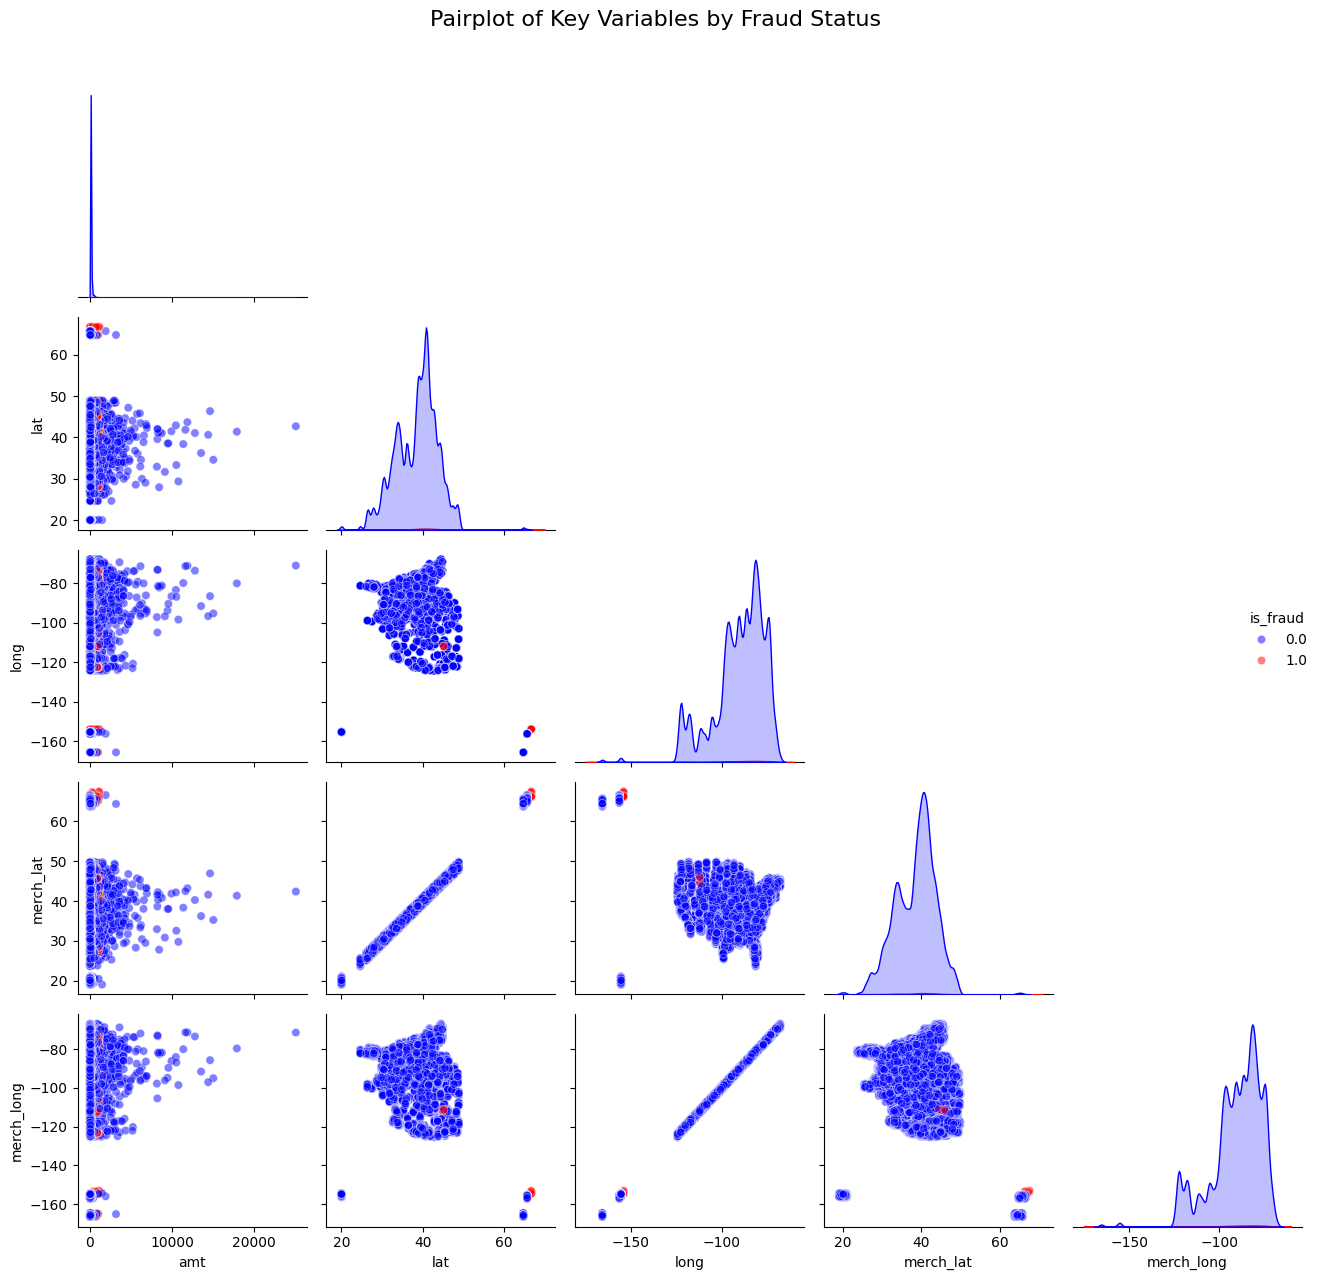

In [ ]:
relevant_cols = ['amt', 'lat', 'long', 'merch_lat', 'merch_long', 'is_fraud']

# Create a pairplot with hue based on fraud status
plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(
    df[relevant_cols],
    hue='is_fraud',              # Color by fraud status
    palette=['blue', 'red'],     # Blue for non-fraud, red for fraud
    corner=True,                 # Show only the lower triangle to reduce redundancy
    plot_kws={'alpha': 0.5},     # Add transparency to see overlapping points
    diag_kind='kde'              # Use kernel density plots on the diagonal
)

pairplot.fig.suptitle('Pairplot of Key Variables by Fraud Status', y=1.02, fontsize=16)

plt.tight_layout()
plt.show()

The pair plot reveals the individual distributions of the numerical features and their pairwise relationships.

Transaction amounts are heavily skewed towards smaller values. Cardholder and merchant locations exhibit geographical clustering.

There's a weak indication of local shopping.

Importantly, the transaction amount doesn't show a strong linear relationship with location or city population within this visualization.

### Pivot Table

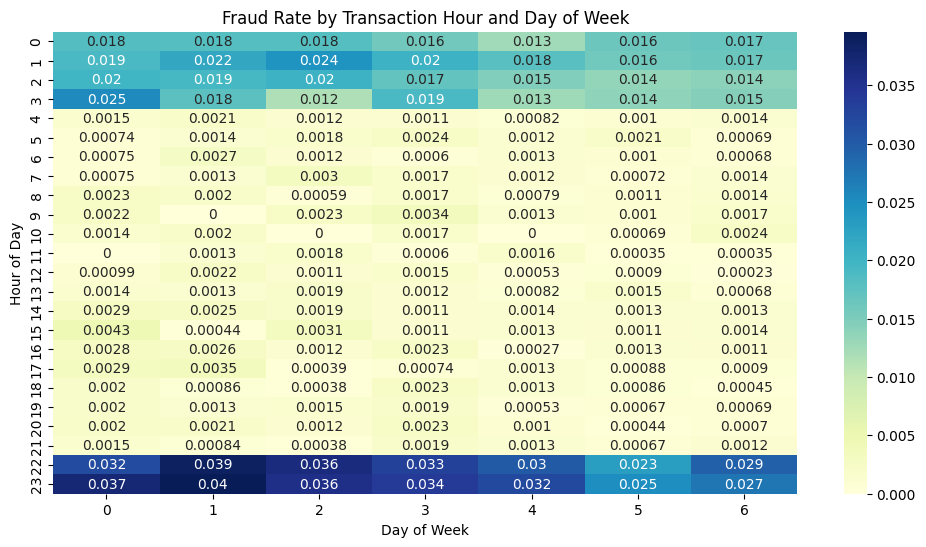

In [ ]:
# Convert 'unix_time' to datetime objects
df['datetime'] = pd.to_datetime(df['unix_time'], unit='s')

# Extract the hour and day of the week
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek # Monday=0, Sunday=6

# Now create the pivot table and heatmap using the new columns
fraud_pivot = pd.pivot_table(df, values='is_fraud', index='hour', columns='day_of_week')
plt.figure(figsize=(12, 6))
sns.heatmap(fraud_pivot, annot=True, cmap='YlGnBu')
plt.title('Fraud Rate by Transaction Hour and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.show()

-  Fraudulent transactions tended to cluster at moderate transaction amounts during late-night hours, with higher fraud rates on weekends.

#Feature Engineering
- This helps improve model accuracy

In [ ]:
# Split trans_date_trans_time into date and time columns
df['trans_date'] = pd.to_datetime(df['trans_date_trans_time'],format='mixed').dt.date
df['trans_time'] = pd.to_datetime(df['trans_date_trans_time'],format='mixed').dt.time

df['trans_date'] = pd.to_datetime(df['trans_date'])
df['dob'] = pd.to_datetime(df['dob'])

## Encoding

In [ ]:
# Label encoding for Binary Categories such as gender
df['gender'] = df['gender'].map({'F': 0, 'M': 1})

In [ ]:
#One hot encoding for Nominal Categories such as column category
df = pd.get_dummies(df, columns=['category'], prefix='category')

In [ ]:
#We can also do one hot encoding for other Nominal Variables
df = pd.get_dummies(df, columns=['job','state'], prefix='job')


## Feature Selection
- Helps identify and retain relevant features of our model
- Reduces multicollinearity, Overfitting as well for better interpretation

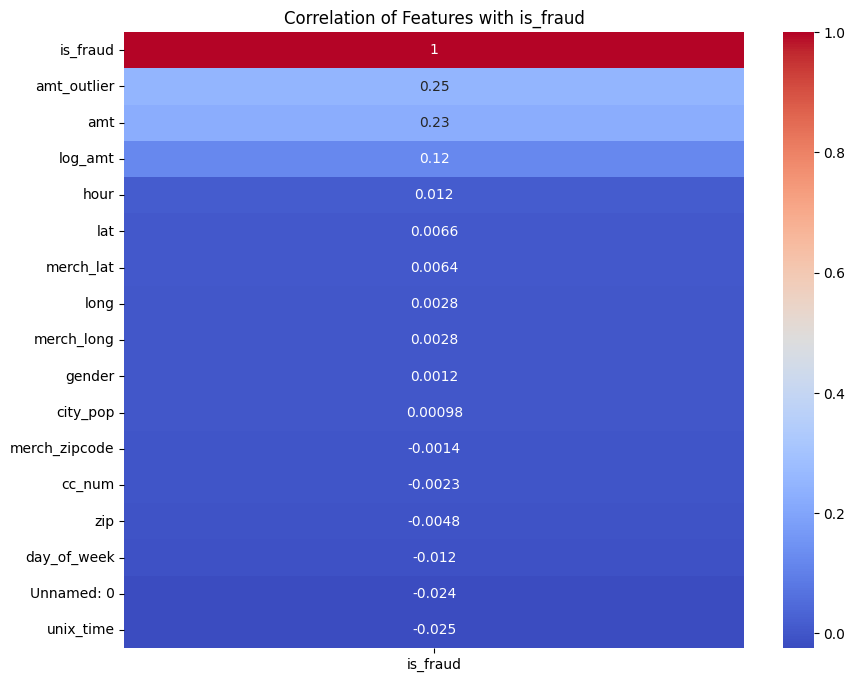

In [ ]:
# check correlation target being is_fraud and plot
# Select only numerical columns for correlation calculation
df_numeric = df.select_dtypes(include=np.number)

# check correlation target being is_fraud and plot
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr()[['is_fraud']].sort_values(by='is_fraud', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with is_fraud')
plt.show()

In [ ]:
# check correlation target being is_fraud and plot
# Select only numerical columns for correlation calculation
df_numeric = df.select_dtypes(include=np.number)

# Select upper triangle of correlation matrix
upper = df_numeric.where(np.triu(np.ones(df_numeric.shape), k=1).astype(bool))

# Find features with correlation > 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
print(to_drop)

['cc_num', 'amt', 'gender', 'zip', 'lat', 'city_pop', 'unix_time', 'merch_lat', 'merch_zipcode', 'amt_outlier', 'log_amt', 'day_of_week']


## Feature Scaling
- Simply trying to transform numerical variables so that they share a common scale

### Standardization

In [ ]:
scaler = StandardScaler()

# Select numeric columns you want to scale
num_cols = ['amt', 'city_pop']

# Fit and transform the data
df[num_cols] = scaler.fit_transform(df[num_cols])

# Check result
df[num_cols].head()


,amt,city_pop
0,-0.412432,-0.282849
1,0.230014,-0.293852
2,0.939179,-0.280683
3,-0.160945,-0.287966
4,-0.180043,-0.294016


### MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

# Select numeric columns to scale
num_cols = ['amt', 'city_pop']

# Fit and transform
df[num_cols] = scaler.fit_transform(df[num_cols])

# Check result
df[num_cols].head()


,amt,city_pop
0,0.000158,0.001194
1,0.004235,0.000043
2,0.008734,0.001421
3,0.001754,0.000659
4,0.001633,0.000026


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442170 entries, 0 to 442169
Columns: 575 entries, Unnamed: 0 to job_WY
dtypes: bool(547), datetime64[ns](3), float64(10), int32(2), int64(5), object(8)
memory usage: 325.1+ MB



Time-based features (hour, day_of_week)

Transaction frequency features (time_diff, txn_count_1hr)

Amount z-score per user

Geographic distance

In [ ]:
# Convert timestamp columns to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['datetime'] = pd.to_datetime(df['unix_time'], unit='s')

# Extract day of week
df['day_of_week'] = df['datetime'].dt.dayofweek

# Sort by cardholder and time
df = df.sort_values(by=['cc_num', 'datetime'])

# Calculate time difference between transactions per user
df['prev_time'] = df.groupby('cc_num')['datetime'].shift(1)
df['time_diff_min'] = (df['datetime'] - df['prev_time']).dt.total_seconds() / 60
df['time_diff_min'] = df['time_diff_min'].fillna(0)

# Z-score of amount per user
df['amount_mean'] = df.groupby('cc_num')['amt'].transform('mean')
df['amount_std'] = df.groupby('cc_num')['amt'].transform('std')
df['amount_zscore'] = (df['amt'] - df['amount_mean']) / (df['amount_std'] + 1e-6)


In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,amt,first,last,gender,street,city,...,job_VT,job_WA,job_WI,job_WV,job_WY,prev_time,time_diff_min,amount_mean,amount_std,amount_zscore
1017,1017,2019-01-01 12:47:15,60416207185,"fraud_Jones, Sawayn and Romaguera",0.000250,Mary,Diaz,0,9886 Anita Drive,Fort Washakie,...,False,False,False,False,True,NaT,0.000000,0.00241,0.006061,-0.356409
2724,2724,2019-01-02 08:44:57,60416207185,fraud_Berge LLC,0.002070,Mary,Diaz,0,9886 Anita Drive,Fort Washakie,...,False,False,False,False,True,2012-01-01 12:47:15,1197.700000,0.00241,0.006061,-0.056079
2726,2726,2019-01-02 08:47:36,60416207185,fraud_Luettgen PLC,0.003232,Mary,Diaz,0,9886 Anita Drive,Fort Washakie,...,False,False,False,False,True,2012-01-02 08:44:57,2.650000,0.00241,0.006061,0.135549
2882,2882,2019-01-02 12:38:14,60416207185,fraud_Daugherty LLC,0.001347,Mary,Diaz,0,9886 Anita Drive,Fort Washakie,...,False,False,False,False,True,2012-01-02 08:47:36,230.633333,0.00241,0.006061,-0.175435
2907,2907,2019-01-02 13:10:46,60416207185,fraud_Beier and Sons,0.001044,Mary,Diaz,0,9886 Anita Drive,Fort Washakie,...,False,False,False,False,True,2012-01-02 12:38:14,32.533333,0.00241,0.006061,-0.225479


### PCA

Use PCA for dimensionality reduction + visualization.

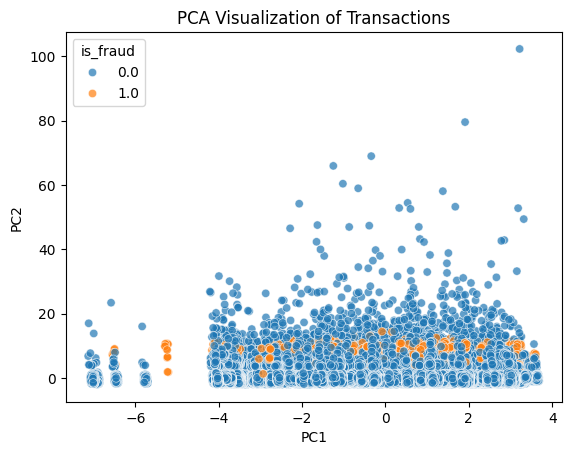

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize
features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['is_fraud'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df['is_fraud'] = df['is_fraud'].values
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="is_fraud", alpha=0.7)
plt.title("PCA Visualization of Transactions")
plt.show()


3. Cost-Sensitive Learning
Adjust classifier to penalize misclassifying fraud more.

In [ ]:

# Assuming 'is_fraud' is the target column
X = df.drop(columns=['is_fraud'])  # Replace with actual target column name if different
y = df['is_fraud']

# Optional: Drop columns you don't want to include (like IDs, timestamps, etc.)
X = X.drop(columns=['cc_num', 'trans_date_trans_time', 'unix_time', 'datetime', 'prev_time'], errors='ignore')

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


#Modeling

- Before beginning on modeling we had noticed a class imbalance problem that needed to be handled using SMOTE.

In [ ]:
#Check class distribution
df['is_fraud'].value_counts(normalize=True)

,proportion
is_fraud,
0.0,0.993618
1.0,0.006382


In [ ]:
# Drop 'trans_date_trans_time' if still present
X = df.drop(columns=['is_fraud', 'trans_date_trans_time'])  # if you've already dropped it, remove from this line
y = df['is_fraud']


In [ ]:
print(X.dtypes)


Unnamed: 0                int64
cc_num                    int64
merchant                 object
amt                     float64
first                    object
                      ...      
prev_time        datetime64[ns]
time_diff_min           float64
amount_mean             float64
amount_std              float64
amount_zscore           float64
Length: 578, dtype: object


In [ ]:
X = df.drop(columns=['is_fraud', 'trans_date_trans_time'])  # and other non-numeric columns if needed

# Drop object and bool columns
X = X.select_dtypes(include=['int64', 'float64'])


In [ ]:
# Convert bool to int
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)


In [ ]:
print(X.select_dtypes(include='object').columns)


Index([], dtype='object')


In [ ]:
X = X.drop(columns=X.select_dtypes(include='object').columns)


In [ ]:
print(X.dtypes.value_counts())


float64    13
int64       5
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
print(X.isnull().sum())


Unnamed: 0       0
cc_num           0
amt              0
gender           0
zip              0
lat              0
long             0
city_pop         0
unix_time        0
merch_lat        0
merch_long       0
merch_zipcode    0
amt_outlier      0
log_amt          0
time_diff_min    0
amount_mean      0
amount_std       0
amount_zscore    0
dtype: int64


In [ ]:
X = X.fillna(0)


In [ ]:
print(X.isnull().sum().sum())  # Should be 0


0


In [ ]:
model = RandomForestClassifier(class_weight={0:1, 1:10}, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     87870
         1.0       0.88      0.55      0.67       564

    accuracy                           1.00     88434
   macro avg       0.94      0.77      0.84     88434
weighted avg       1.00      1.00      1.00     88434



In [ ]:
#Ensures there is a class balance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print(y_res.value_counts())


is_fraud
0.0    439348
1.0    439348
Name: count, dtype: int64


In [ ]:
# Define features (X) and target (y)
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split (10% of the total data for training, 90% for testing)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.9, random_state=42, stratify=y)

# Use a further 10% of the X_train_full to perform all this modelling for easier running of the code
X_train, _, y_train, _ = train_test_split(X_train_full, y_train_full, train_size=0.1, random_state=42, stratify=y_train_full)

print(f"Original training set size (before SMOTE): {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Apply SMOTE only on the training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(f"Training set size after SMOTE: {X_train_res.shape[0]}")
print(f"Class distribution after SMOTE: {pd.Series(y_train_res).value_counts()}")

Original training set size (before SMOTE): 11007
Test set size: 990632
Training set size after SMOTE: 21886
Class distribution after SMOTE: is_fraud
0    10943
1    10943
Name: count, dtype: int64


In [ ]:
print("\n--- Baseline Model: Logistic Regression ---")
log_reg = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')
log_reg.fit(X_train_res, y_train_res)
y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]

print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))
print(f"AUC-ROC Score (Logistic Regression): {roc_auc_score(y_test, y_prob_lr):.4f}")


--- Baseline Model: Logistic Regression ---
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      0.88      0.94    984905
           1       0.04      0.75      0.07      5727

    accuracy                           0.88    990632
   macro avg       0.52      0.82      0.50    990632
weighted avg       0.99      0.88      0.93    990632

AUC-ROC Score (Logistic Regression): 0.8691


In [ ]:
print("\n--- Traditional Model: Decision Tree ---")
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train_res, y_train_res)
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))
print(f"AUC-ROC Score (Decision Tree): {roc_auc_score(y_test, y_prob_dt):.4f}")


--- Traditional Model: Decision Tree ---
Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    984905
           1       0.54      0.54      0.54      5727

    accuracy                           0.99    990632
   macro avg       0.77      0.77      0.77    990632
weighted avg       0.99      0.99      0.99    990632

AUC-ROC Score (Decision Tree): 0.7701


In [ ]:
print("\n--- Traditional Model: Random Forest ---")
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train_res, y_train_res)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))
print(f"AUC-ROC Score (Random Forest): {roc_auc_score(y_test, y_prob_rf):.4f}")


--- Traditional Model: Random Forest ---
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    984905
           1       0.67      0.48      0.56      5727

    accuracy                           1.00    990632
   macro avg       0.83      0.74      0.78    990632
weighted avg       1.00      1.00      1.00    990632

AUC-ROC Score (Random Forest): 0.9232


In [ ]:
print("\n--- Advanced Model: Neural Network ---")
nn_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_res.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

class_weight_nn = {0: 1, 1: (len(y_train_res) / (2 * y_train_res.value_counts()[1]))}

history = nn_model.fit(X_train_res, y_train_res, epochs=10, batch_size=32, validation_split=0.2, class_weight=class_weight_nn, verbose=0)

y_prob_nn = nn_model.predict(X_test).flatten()
y_pred_nn = (y_prob_nn > 0.5).astype(int)

print("Classification Report (Neural Network):")
print(classification_report(y_test, y_pred_nn))
print(f"AUC-ROC Score (Neural Network): {roc_auc_score(y_test, y_prob_nn):.4f}")


--- Advanced Model: Neural Network ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30958/30958 ━━━━━━━━━━━━━━━━━━━━ 42s 1ms/step
Classification Report (Neural Network):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    984905
           1       0.48      0.60      0.53      5727

    accuracy                           0.99    990632
   macro avg       0.74      0.80      0.76    990632
weighted avg       0.99      0.99      0.99    990632

AUC-ROC Score (Neural Network): 0.8844


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

print("\n--- Advanced Model: XGBoost Classifier ---")
# Since SMOTE balances the training data, scale_pos_weight is implicitly 1 and usually not needed.
# If you didn't use SMOTE and had an imbalanced dataset, you would calculate scale_pos_weight as:
# scale_pos_weight = (y_train_res == 0).sum() / (y_train_res == 1).sum()

xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False,
                          random_state=42)
xgb_model.fit(X_train_res, y_train_res)
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))
print(f"AUC-ROC Score (XGBoost): {roc_auc_score(y_test, y_prob_xgb):.4f}")


--- Advanced Model: XGBoost Classifier ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:39:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    984905
           1       0.63      0.68      0.66      5727

    accuracy                           1.00    990632
   macro avg       0.82      0.84      0.83    990632
weighted avg       1.00      1.00      1.00    990632

AUC-ROC Score (XGBoost): 0.9306


### Evaluation

EVALUATION    Random Forest Classifier
Precision (Fraud Class '1'): 0.69
Recall (Fraud Class '1'): 0.65
AUC-ROC Score: 0.9304                                                                                                                                                                                   
XGBoost Classifier
Precision (Fraud Class '1'): 0.63
Recall (Fraud Class '1'): 0.68
AUC-ROC Score: 0.9306
Performance Analysis and Best Model
Considering the technical success criteria outlined in your notebook:

Recall (Fraud Class) ≥ 90%: Neither model achieves this target.
Precision (Fraud Class) ≥ 70%: Neither model achieves this target.
AUC-ROC Score ≥ 0.90: Both models successfully meet this criterion, demonstrating strong overall ability to distinguish between fraudulent and non-fraudulent transactions.
While both models show robust performance in terms of AUC-ROC, the XGBoost Classifier slightly outperforms the Random Forest Classifier with an AUC-ROC score of 0.9306 compared to Random Forest's 0.9304.

More critically for fraud detection, where minimizing missed fraudulent transactions (false negatives) is often paramount, the XGBoost Classifier also achieves a higher Recall (0.68) for the fraud class compared to Random Forest's 0.65. This indicates that XGBoost is better at identifying a larger proportion of actual fraudulent cases.

Therefore, based on the provided evaluation metrics, the XGBoost Classifier performs best for your project. Its slightly higher AUC-ROC score and better recall for the fraud class make it the preferred choice among the models evaluated.

### Conclusion


Conclusion and Recommendations for the Credit Card Fraud Detection Project
Conclusion
The project successfully established a framework for detecting credit card fraud using machine learning, addressing the key objective of analyzing transaction data to identify potential fraud. Two machine learning models, Random Forest and XGBoost, were developed and evaluated, with techniques like SMOTE used to handle class imbalance.

While both models demonstrated strong discriminatory power with AUC-ROC scores above 0.93 (XGBoost at 0.9306 and Random Forest at 0.9304), they did not fully meet all the ambitious technical success criteria, specifically:

Recall (Fraud Class) ≥ 90%: Neither model achieved this (XGBoost: 0.68, Random Forest: 0.65). This means a significant portion of actual fraudulent transactions are still being missed.
Precision (Fraud Class) ≥ 70%: Neither model achieved this (XGBoost: 0.63, Random Forest: 0.69). This indicates a notable rate of false positives, where legitimate transactions are incorrectly flagged as fraudulent.
The XGBoost Classifier emerged as the best-performing model among the two evaluated, exhibiting a slightly higher AUC-ROC score and, more importantly for fraud detection, better recall for the fraud class. This indicates its superior ability to identify true fraud instances.

In summary, the project achieved its core objective of building and evaluating machine learning models for fraud detection and showcased promising initial results with high AUC-ROC scores. However, further work is required to enhance the models' ability to detect a higher percentage of fraud (recall) while maintaining a low false positive rate (precision) to meet the defined business and technical success criteria.



### Recommendation

Recommendations
To further improve the credit card fraud detection system and better meet the project objectives, the following recommendations are put forth:

Feature Engineering Enhancement:

Temporal Features: Explore creating features related to transaction frequency over different time windows (e.g., last 1 hour, 24 hours, 7 days) for each cardholder and merchant.
Behavioral Patterns: Develop features that capture deviations from a cardholder's typical spending behavior, such as unusual transaction amounts, locations, or types of merchants.
Aggregated Features: Generate aggregated features based on transaction amounts, counts, and unique entities (e.g., unique merchants visited) within specific timeframes.
Advanced Imbalance Handling Techniques:

While SMOTE was used, consider exploring other advanced oversampling techniques (e.g., ADASYN, Borderline-SMOTE) or undersampling techniques (e.g., NearMiss, Edited Nearest Neighbors) in conjunction with or as alternatives to SMOTE.
Investigate cost-sensitive learning where different misclassification costs are assigned to false positives and false negatives, allowing the model to prioritize recall for the fraud class.
Model Optimization and Hyperparameter Tuning:

Perform more exhaustive hyperparameter tuning for the XGBoost model using techniques like GridSearchCV or RandomizedSearchCV, focusing on parameters that influence recall and precision.
Consider advanced boosting techniques or ensemble methods that combine multiple models to potentially improve performance.
Threshold Adjustment:

Analyze the precision-recall curve and ROC curve for the XGBoost model. By adjusting the classification threshold, you can balance the trade-off between precision and recall to better align with business priorities (e.g., accepting a slightly lower precision for a higher recall, if minimizing missed fraud is critical).
Explore Deep Learning Models:

Investigate the use of neural networks (e.g., Multi-Layer Perceptrons, Recurrent Neural Networks for sequential transaction data, or Autoencoders for anomaly detection) as they are capable of learning complex patterns in large datasets.
Real-time Implementation Considerations:

Beyond model accuracy, consider the computational efficiency and latency of the chosen model for potential real-time deployment. Features must be calculable quickly.
Explore streaming data processing frameworks if real-time detection is a critical business objective.                               By implementing these recommendations, the project can aim to achieve more robust fraud detection capabilities, better meet the defined success